### Benchmarking Patch Size for Simulation Speedup

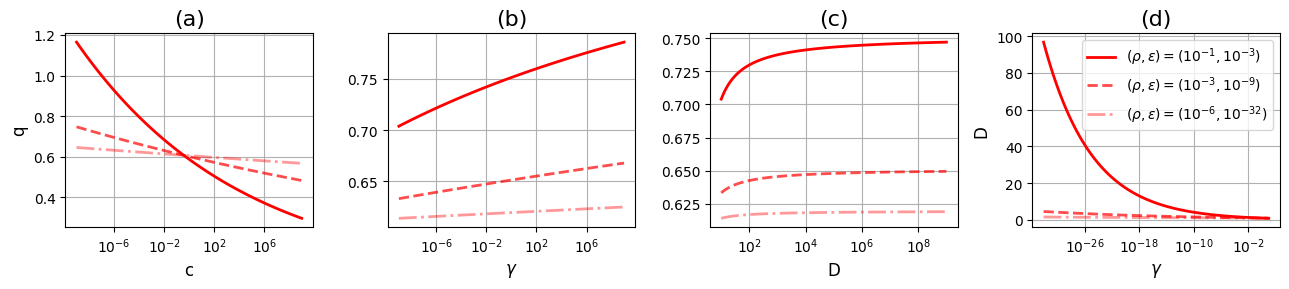

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameter sets
param_sets = [
    (1e-1, 1e-3, 1.0, '-', r'$(\rho,\epsilon)=(10^{-1},10^{-3})$'),
    (1e-3, 1e-9, 0.7, '--', r'$(\rho,\epsilon)=(10^{-3},10^{-9})$'),
    (1e-6, 1e-32, 0.4, '-.', r'$(\rho,\epsilon)=(10^{-6},10^{-32})$')
]

# Log-spaced variables
c = np.logspace(-9, 9, num=100)
gamma = np.logspace(-9, 9, num=100)
D = np.logspace(1, 9, num=100)
gamma_small = np.logspace(-32, 0.99, num=100)

# Plotting
fig, axs = plt.subplots(1, 4, figsize=(13, 3), sharex=False, sharey=False)
titles = ['(a)', '(b)', '(c)', '(d)']

for i, (rho, eps, alpha, linestyle, label) in enumerate(param_sets):
    # Computations
    q_c = np.exp(- (np.log(c / (rho * eps**2)) / (2 * np.log(1 / (rho * eps**2)) + 2 * np.log(1e-3) / np.log(10**3))))
    q_gamma = np.exp(- (np.log(1e-3 / (rho * eps**2)) / (2 * np.log(1 / (rho * eps**2)) + 2 * np.log(gamma) / np.log(10**3))))
    q_D = np.exp(- (np.log(1e-3 / (rho * eps**2)) / (2 * np.log(1 / (rho * eps**2)) + 2 * np.log(1e-3) / np.log(D))))
    D_bound = np.exp(np.log(gamma_small) / (np.log(rho) + 2*np.log(eps)))

    axs[0].plot(c, q_c, color='red', linewidth=2, alpha=alpha, linestyle=linestyle)
    axs[1].plot(gamma, q_gamma, color='red', linewidth=2, alpha=alpha, linestyle=linestyle)
    axs[2].plot(D, q_D, color='red', linewidth=2, alpha=alpha, linestyle=linestyle)
    axs[3].plot(gamma_small, D_bound, color='red', linewidth=2, alpha=alpha, linestyle=linestyle, label=label)

# Set x-labels and titles
axs[0].set_xscale('log')
axs[0].set_xlabel('c', fontsize=12)
axs[0].set_ylabel('q', fontsize=12)
axs[0].set_title(titles[0], fontsize=16)
axs[0].grid(True)

axs[1].set_xscale('log')
axs[1].set_xlabel(r'$\gamma$', fontsize=12)
axs[1].set_title(titles[1], fontsize=16)
axs[1].grid(True)

axs[2].set_xscale('log')
axs[2].set_xlabel('D', fontsize=12)
axs[2].set_title(titles[2], fontsize=16)
axs[2].grid(True)

axs[3].set_xscale('log')
axs[3].set_xlabel(r'$\gamma$', fontsize=12)
axs[3].set_ylabel('D', fontsize=12)
axs[3].set_title(titles[3], fontsize=16)
axs[3].grid(True)
axs[3].legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.savefig("patchsizes.pdf", format="pdf")
plt.show()
